In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re


In [5]:
df = pd.read_csv('../Dataset/Kindle_reviews.csv')


# Data Overview

In [6]:
df.shape

(982619, 10)

In [7]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [8]:
df.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [9]:
df = df[['asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
         'reviewerID', 'reviewerName', 'summary', 'unixReviewTime']]


In [10]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


# Data Visualization

In [11]:
rf=df[['overall', 'reviewText']]

In [12]:
rf.head()

,overall,reviewText
0,5,I enjoy vintage books and movies so I enjoyed ...
1,4,This book is a reissue of an old one; the auth...
2,4,This was a fairly interesting read. It had ol...
3,5,I'd never read any of the Amy Brewster mysteri...
4,4,"If you like period pieces - clothing, lingo, y..."


In [13]:
rf["overall"].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [14]:
import re


In [15]:
from wordcloud import WordCloud
# Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would", "shall", "could", "might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words = set(stop_words)
print(stop_words)


{'t', 'the', 'same', "should've", 'won', 'up', 'in', 'wouldn', 'as', 'while', 'very', 'after', "shan't", 'a', "it's", 'didn', "mustn't", 'should', 'between', 'll', 'by', 'has', 'his', 'could', 'whom', 'few', 'yours', 'haven', 'would', 'there', 'so', 'itself', 'its', "hadn't", 'our', 'does', 'ain', 'having', 'been', 'too', 'ours', 'doing', 'nor', 'which', 'to', 'd', 'were', 'at', 'doesn', 'we', 'on', 'such', "weren't", 'of', 'with', 'from', 'why', 'against', 'are', 'further', 'don', "haven't", 'if', 'shan', 'an', 'that', 'couldn', 'their', 'where', 'himself', 'be', 'about', "she's", 'y', "isn't", 'some', 's', "you'll", 'they', 'own', 'only', 'through', 'hasn', 'then', 'needn', 'weren', 'she', 'just', 'your', 'mustn', "couldn't", 'shall', "hasn't", 'myself', 'when', 'off', 'most', 'm', 'both', 'it', "needn't", 'all', 'other', "wasn't", 'hers', "aren't", 'into', 'yourself', 'had', 'being', 'mightn', 'theirs', 'might', "that'll", 'again', 'more', 'can', 'isn', 'me', 'once', 'ma', 'am', 'be

In [16]:
# Removing special character
def remove_special_character(content):
    return re.sub('\W+', ' ', content)  # re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's


def remove_url(content):
    return re.sub(r'http\S+', '', content)

# Removing the stopwords from text


def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions


# Expansion of english contractions
# substitution of different stopwords from the reviews column with expanded words
# Create a dictionary to map contractions to their expanded forms
contraction_mapping = {
    r"won\'t": "would not",
    r"can\'t": "can not",
    r"don\'t": "do not",
    r"shouldn\'t": "should not",
    r"needn\'t": "need not",
    r"hasn\'t": "has not",
    r"haven\'t": "have not",
    r"weren\'t": "were not",
    r"mightn\'t": "might not",
    r"didn\'t": "did not",
    r"n\'t": " not",
    r"\'re": " are",
    r"\'s": " is",
    r"\'m": "am",
    r"\'ve": " have"
}


def contraction_expansion(content):

    for pattern, replacement in contraction_mapping.items():
        content = re.sub(pattern, replacement, content)

    return content

# Data preprocessing


def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)

    content = remove_stopwords(content)
    return content


In [17]:
rf.isnull().sum()


overall        0
reviewText    22
dtype: int64

In [18]:
# Check which rows in 'Column1' have non-string values
non_string_rows = rf['reviewText'].apply(lambda x: not isinstance(x, str))

# Drop rows with non-string values in 'Column1'
rf = rf.dropna(subset=['reviewText'], how='all')


In [19]:
# pd.options.display.max_colwidth = 1000
# Data cleaning
rf['Reviews_clean'] = rf['reviewText'].apply(data_cleaning)



In [20]:
rf.head(1)

,overall,reviewText,Reviews_clean
0,5,I enjoy vintage books and movies so I enjoyed ...,enjoy vintage books movies enjoyed reading boo...


# Data Visualization:

In [21]:
df['overall'].describe()


count    982619.000000
mean          4.347801
std           0.955056
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [22]:
print('Unique reviews:%s' % rf.Reviews_clean.nunique())
# print('Unique movie names:%s' % df.Movies.nunique())
# print('No of ratings:%s'% df.Ratings.count())

Unique reviews:981458


In [23]:
rf.shape

(982597, 3)

In [24]:
rf.drop_duplicates()

,overall,reviewText,Reviews_clean
0,5,I enjoy vintage books and movies so I enjoyed ...,enjoy vintage books movies enjoyed reading boo...
1,4,This book is a reissue of an old one; the auth...,book reissue old one author born era say nero ...
2,4,This was a fairly interesting read. It had ol...,fairly interesting read old style terminology ...
3,5,I'd never read any of the Amy Brewster mysteri...,never read amy brewster mysteries one really h...
4,4,"If you like period pieces - clothing, lingo, y...",like period pieces clothing lingo enjoy myster...
...,...,...,...
982614,5,Yasss hunny! This is a great read. That Dre is...,yasss hunny great read dre mess cherika refuse...
982615,5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,enjoyed book beginning end far lex hoe sneaky ...
982616,5,Great book! Cherika was a fool. She let that m...,great book cherika fool let man get away much ...
982617,5,When I say this was an excellent book please b...,say excellent book please believe definitely p...


In [25]:
rf.shape

(982597, 3)

In [26]:
rf.tail()

,overall,reviewText,Reviews_clean
982614,5,Yasss hunny! This is a great read. That Dre is...,yasss hunny great read dre mess cherika refuse...
982615,5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,enjoyed book beginning end far lex hoe sneaky ...
982616,5,Great book! Cherika was a fool. She let that m...,great book cherika fool let man get away much ...
982617,5,When I say this was an excellent book please b...,say excellent book please believe definitely p...
982618,5,This book was everything. I just hope Alexus w...,book everything hope alexus wise move lawd tho...


# Data Visualization

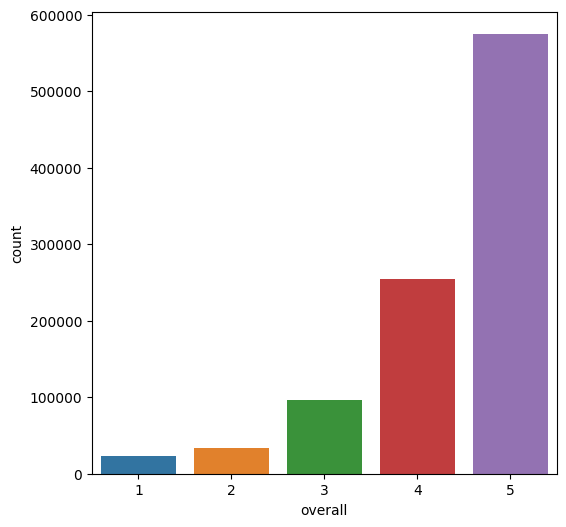

5    575264
4    254013
3     96194
2     34130
1     23018
Name: overall, dtype: int64


In [28]:
import seaborn as sns
# Checking for Class Imbalance
fig = plt.figure(figsize=(6, 6))
sns.countplot(x=df['overall'])

# Save the plot as a JPG file
plt.savefig('class_imbalance_plot.jpg', format='jpg')

# Display the plot
plt.show()

print(df['overall'].value_counts())


In [32]:
from wordcloud import WordCloud
# Your code for generating the word cloud
sentences = rf['Reviews_clean']
pos = ' '.join(map(str, sentences[rf['overall'] >= 4]))
neg = ' '.join(map(str, sentences[rf['overall'] <= 2]))

pos_wordcloud = WordCloud(width=1500, height=800, background_color='black',
                          stopwords=stop_words, min_font_size=15).generate(pos)

# Create a figure for the word cloud
plt.figure(figsize=(12, 12))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

# Save the word cloud plot as a JPG file
plt.savefig('positive_reviews_wordcloud.jpg', format='jpg')

# Show the word cloud plot
plt.show()
